<h1>Práctica 8: Forecasting - Forecast usando regresión lineal y series de tiempo</h1>

<h2>Objetivo:</h2>
<p>Usar datos históricos para crear un modelo de <strong>regresión lineal</strong> y <strong>predecir valores futuros</strong> a partir de una serie de tiempo.</p>

<h1>Introducción: Forecasting</h1>

<p>
El <strong>Forecasting</strong> (pronosticación o predicción) es una técnica que consiste en analizar datos históricos para hacer estimaciones o predicciones sobre datos futuros. 
Es ampliamente utilizado en áreas como economía, finanzas, meteorología, ventas, tráfico web y más.
</p>

<p>
Una herramienta común para hacer forecasting es la <strong>regresión lineal</strong>, donde el objetivo es encontrar una relación matemática simple entre el tiempo (días, meses, años) y el valor que queremos predecir (ventas, usuarios, temperatura, etc.).
</p>

<h2>¿Qué es una serie de tiempo?</h2>

<p>
Una <strong>serie de tiempo</strong> es un conjunto de datos ordenados cronológicamente. 
Cada dato corresponde a un momento específico en el tiempo. 
Ejemplos:
</p>
<ul>
  <li>Ventas de una tienda por día.</li>
  <li>Temperatura de una ciudad cada hora.</li>
  <li>Usuarios activos en una aplicación cada semana.</li>
</ul>

<h2>¿Por qué usar forecasting?</h2>

<ul>
  <li>Para planificar el futuro basándonos en patrones pasados.</li>
  <li>Para tomar decisiones informadas (por ejemplo: ¿necesitaremos más recursos?).</li>
  <li>Para identificar tendencias o cambios inusuales en los datos.</li>
</ul>

<h2>¿Qué método utilizaremos?</h2>

<p>
Usaremos <strong>Regresión Lineal</strong> simple, que busca ajustar una recta a los datos para poder extrapolar (predecir) valores futuros de forma sencilla y rápida.
</p>


<h3>Importamos librerías</h3>





In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<h3>Cargo el dataset</h3>

In [6]:
df = pd.read_csv('csv/hour_cleaned.csv')

<h3>Me aseguro de que la fecha esté en formato de fecha</h3>

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])

<h3>Agrupo los datos por fecha (sumando el número total de usuarios cada día)</h3>

In [8]:
df_day = df.groupby('dteday')['cnt'].sum().reset_index()

<h3>Para el modelo, creamos una variable "día" que sea el número del día</h3>

In [9]:
df_day['day_num'] = np.arange(len(df_day))

<h3>Definimos las variables</h3>

In [10]:
X = df_day[['day_num']]  # Día como variable independiente
y = df_day['cnt']        # Número de usuarios como variable dependiente

<h3>Creamos el modelo de regresión lineal</h3>

In [11]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

<h3>Predecimos los valores actuales</h3>

In [12]:
y_pred = model.predict(X)

<h3>Graficamos</h3>


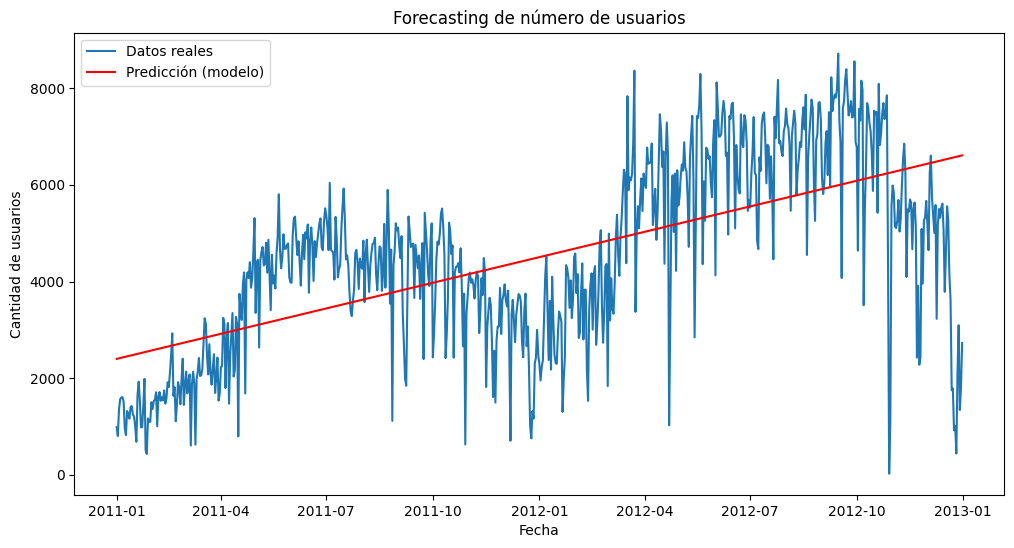

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_day['dteday'], y, label='Datos reales')
plt.plot(df_day['dteday'], y_pred, label='Predicción (modelo)', color='red')
plt.title('Forecasting de número de usuarios')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.show()


<h3> Ahora predecimos nuevos días (por ejemplo, los próximos 30 días)</h3>

In [14]:
future_days = np.arange(len(df_day), len(df_day)+30).reshape(-1,1)
future_preds = model.predict(future_days)

C:\Users\super\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h3>Mostramos las predicciones</h3>

In [15]:
for i, pred in enumerate(future_preds, 1):
    print(f"Día {len(df_day)+i}: Predicción de usuarios = {int(pred)}")

Día 732: Predicción de usuarios = 6615
Día 733: Predicción de usuarios = 6621
Día 734: Predicción de usuarios = 6627
Día 735: Predicción de usuarios = 6633
Día 736: Predicción de usuarios = 6638
Día 737: Predicción de usuarios = 6644
Día 738: Predicción de usuarios = 6650
Día 739: Predicción de usuarios = 6656
Día 740: Predicción de usuarios = 6661
Día 741: Predicción de usuarios = 6667
Día 742: Predicción de usuarios = 6673
Día 743: Predicción de usuarios = 6679
Día 744: Predicción de usuarios = 6684
Día 745: Predicción de usuarios = 6690
Día 746: Predicción de usuarios = 6696
Día 747: Predicción de usuarios = 6702
Día 748: Predicción de usuarios = 6708
Día 749: Predicción de usuarios = 6713
Día 750: Predicción de usuarios = 6719
Día 751: Predicción de usuarios = 6725
Día 752: Predicción de usuarios = 6731
Día 753: Predicción de usuarios = 6736
Día 754: Predicción de usuarios = 6742
Día 755: Predicción de usuarios = 6748
Día 756: Predicción de usuarios = 6754
Día 757: Predicción de us